In [106]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

## cv2에서 필터링의 기본 적용 방식과 정규화

In [107]:
# 외곽을 벗어난 곳은 해당 픽셀의 대칭된 위치의 값으로 계산됨.
img = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]],dtype='uint8')

kernel = np.array([[1,0,0],
                   [0,0,0],
                   [0,0,0]])
filterd= cv2.filter2D(img, -1, kernel)

# print(img)
# print(kernel)
print(filterd)

[[5 4 5]
 [2 1 2]
 [5 4 5]]


In [108]:
# 클램핑이 적용되어 (-)값은 모두 0으로 표시됨.
img = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]],dtype='uint8')

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]])
filterd= cv2.filter2D(img, -1, kernel)

# print(img)
# print(kernel)
print(filterd)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [109]:
# 클램핑이 적용되어 255 이상의 값은 모두 255로 표시됨.
img = np.array([[1,2,3],
                [200,5,200],
                [7,8,9]],dtype='uint8')

kernel = np.array([[0,0,0],
                   [1,0,1],
                   [0,0,0]])
filterd= cv2.filter2D(img, -1, kernel)

# print(img)
# print(kernel)
print(filterd)

[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


In [110]:
# 평균을 계산할 경우 (-)값을 표시해야 할 수 있기때문에 type을 float으로 해야함.
img = np.array([[1,2,3],
                [200,5,200],
                [7,8,9]],dtype='float')

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]])
filterd= cv2.filter2D(img, -1, kernel)

# print(img)
# print(kernel)
print(filterd)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [111]:
# -2가 254로 변경되는걸 확인.
cv2.imwrite('output.png', filterd.astype('uint8'))

img = cv2.imread('output.png')
print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


In [112]:
# 정규화 하는 과정 필요 (필터 처리 된 값을 사진(시각화)으로 보기 위해)
ma=np.max(filterd)
print(ma)
mi=np.min(filterd)
print(mi)
ma_mi=np.ptp(filterd) #최대값과 최소값의 차이를 나타내는 함수.
print(ma_mi)


# 최소값과 최대값을 0~255 사이로 바꿔주는 공식. 
# -2~0 -> 0~255
n = (filterd - mi)/(ma-mi) * 255   
print(n)

# 0~2 -> 0~255. (절대값 사용)
n2 = np.abs(filterd)/ np.max(np.abs(filterd)) * 255     
print(n2)

# 최소값과 최대값을 0~255 사이로 바꿔주는 함수.
norm = cv2.normalize(filterd, None, 0, 255, cv2.NORM_MINMAX)
norm = norm.astype('uint8')
print(norm)

0.0
-2.0
2.0
[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]
[[255   0 255]
 [255 255 255]
 [255   0 255]]


(512, 512)
162
-123
290
5
255
0


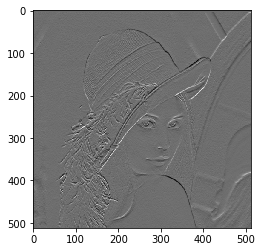

True

In [113]:
# 엠보싱 필터

lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE).astype('int16')
print(lena.shape)
# plt.imshow(lena, cmap='gray')
# plt.show()

kernel = np.array([[0,1,0],
                   [0,0,0],
                   [0,-1,0]])

filtered= cv2.filter2D(lena, -1, kernel)

filtered2= cv2.filter2D(lena, -1, kernel) + 128 #숫자를 더해서 (-)값 올려주기

filtered3= cv2.filter2D(lena, -1, kernel)
filtered3= cv2.normalize(filterd2, None, 0, 255, cv2.NORM_MINMAX) #0~255 정규화

print(np.max(filtered))
print(np.min(filtered))
print(np.max(filtered2))
print(np.min(filtered2))
print(np.max(filtered3))
print(np.min(filtered3))

plt.imshow(filtered3, cmap='gray')
plt.show()

cv2.imwrite('lena_output.png',filtered)
cv2.imwrite('lena_output3.png',filtered3)

<img src='../수업 PPT/ch07_영역 처리를 이용한 에지 검출/슬라이드5.jpg' width=500>

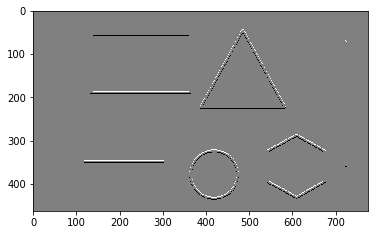

In [117]:
# 수평 edge

test = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE).astype('int16')

# 위아래의 차이 = 수평
kernel = np.array([[0,1,0],
                   [0,0,0],
                   [0,-1,0]])

filtered = cv2.filter2D(test, -1, kernel)
filtered_norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX) #0~255 정규화

cv2.imwrite('test1.png',filtered)
plt.imshow(filtered_norm, cmap='gray')

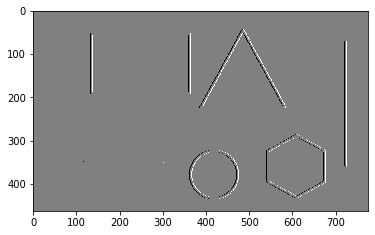

In [118]:
# 수직 edge

test = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE).astype('int16')

# 양 옆의 차이 = 수직
kernel = np.array([[0,0,0],
                   [-1,0,1],
                   [0,0,0]])

filtered = cv2.filter2D(test, -1, kernel)
filtered_norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX) #0~255 정규화

cv2.imwrite('test2.png',filtered)
plt.imshow(filtered_norm, cmap='gray')

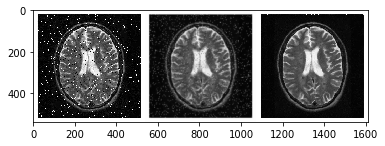

In [127]:
# 다양한 필터들

img = cv2.imread('brain.jpeg')

# 가우시안 필터
gauss = cv2.GaussianBlur(img, (11,11), 0)
# 미디언 필터
median = cv2.medianBlur(img, 5)

plt.imshow(np.hstack([img, gauss, median]))